In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

import datetime as dt

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools


In [24]:
import pandas as pd 
avocado=pd.read_csv('C:/Users/ellen/exercises_pyton/Avocado/avocado.csv',engine='python')
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [25]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
type=list(avocado['type'])
types=list(set(type))
print(types)

['conventional', 'organic']


In [27]:
region_list=list(avocado['region'])
region_set=list(set(region_list))

region_set.remove('TotalUS')
print(region_set)
number_of_regions=(len(region_set))
print(number_of_regions)

['Syracuse', 'PhoenixTucson', 'Roanoke', 'RaleighGreensboro', 'SanFrancisco', 'Indianapolis', 'Charlotte', 'Atlanta', 'Nashville', 'NewOrleansMobile', 'MiamiFtLauderdale', 'Southeast', 'HartfordSpringfield', 'California', 'Boise', 'Boston', 'Chicago', 'HarrisburgScranton', 'Tampa', 'BuffaloRochester', 'Louisville', 'CincinnatiDayton', 'SanDiego', 'Plains', 'DallasFtWorth', 'Seattle', 'Houston', 'StLouis', 'LasVegas', 'LosAngeles', 'BaltimoreWashington', 'Philadelphia', 'Detroit', 'GreatLakes', 'Sacramento', 'RichmondNorfolk', 'Denver', 'West', 'WestTexNewMexico', 'NewYork', 'Spokane', 'Orlando', 'Midsouth', 'SouthCentral', 'Jacksonville', 'Albany', 'Pittsburgh', 'SouthCarolina', 'Northeast', 'GrandRapids', 'NorthernNewEngland', 'Portland', 'Columbus']
53


## By the data investigation so far we know:

- The data has no null entry
- There are 18249 entries 
- 14 columns 
- The columns Date, type and region are objects, Year is interger and the rest are floats
- There are 2 types of avocado: organic and conventional
- Hass Avocados are sold in 53 regions in the USA 

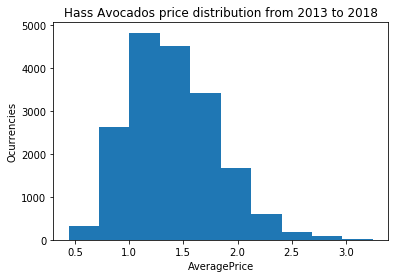

In [28]:
plt.hist(avocado['AveragePrice'])
plt.title('Hass Avocados price distribution from 2013 to 2018')
plt.xlabel('AveragePrice')
plt.ylabel('Ocurrencies')
plt.show()

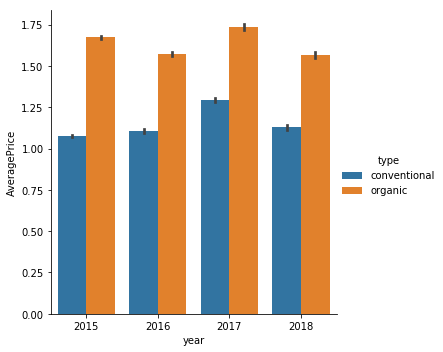

In [29]:
sns.catplot(x="year", y="AveragePrice", hue="type", kind="bar", data=avocado)

In [30]:
Type=avocado.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

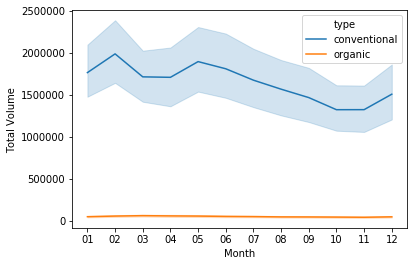

In [31]:
# Split Date in year,month and day

avocado['Year'], avocado['Month'], avocado['Day']=avocado['Date'].str.split('-').str
sns.lineplot(x="Month", y="Total Volume", hue='type', data=avocado)
plt.show()

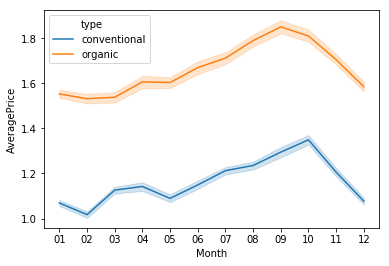

In [32]:
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avocado)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado per Region')

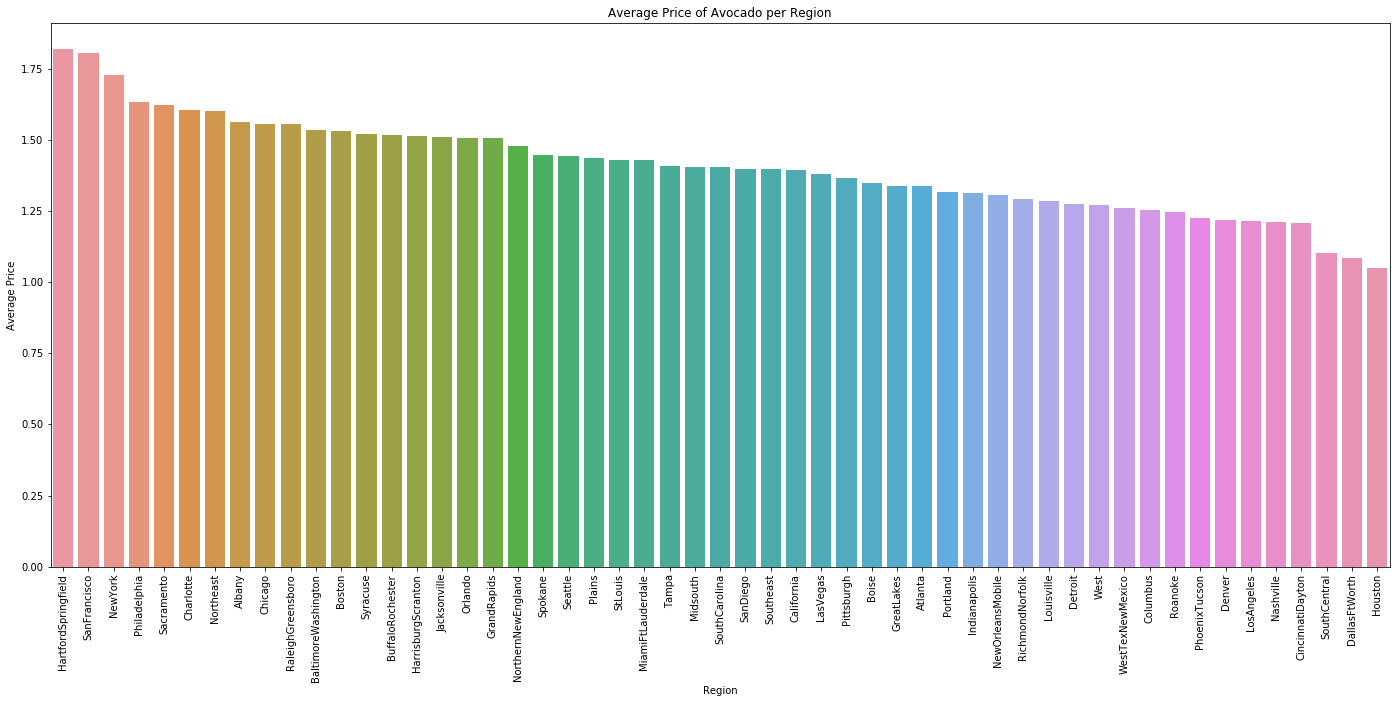

In [33]:
region_list=list(avocado['region'])
region_set=list(set(region_list))
region_set.remove('TotalUS')
#print(region_set)

avg_price_region=[]

for i in region_set:
    x= avocado[avocado.region==i]
    avg_region=sum(x.AveragePrice)/len(x)
    avg_price_region.append(avg_region)

df1=pd.DataFrame({'region_set':region_set,'avg_price_region':avg_price_region})
new_index=df1.avg_price_region.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_set,y=sorted_data.avg_price_region)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado per Region')

Text(0.5, 1.0, 'Total Volume of Avocado per Region')

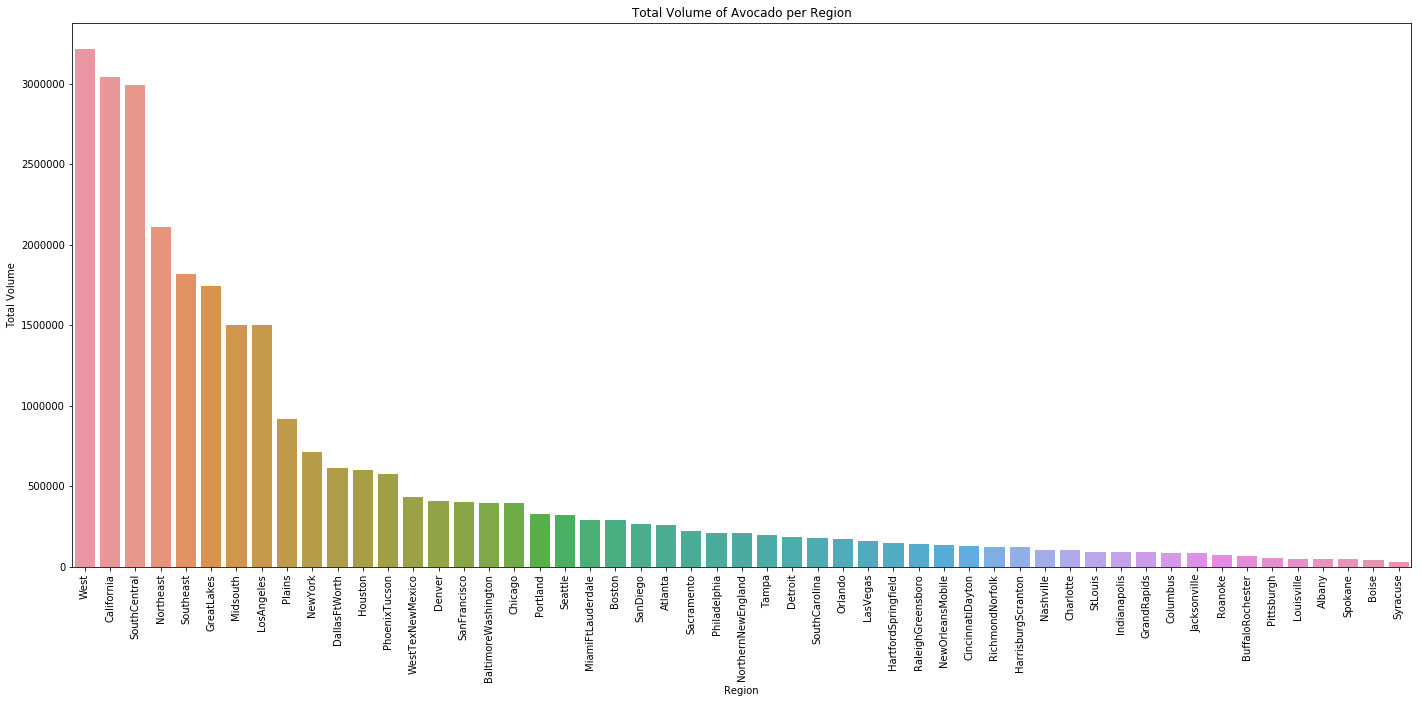

In [34]:
region_list=list(avocado['region'])
region_set=list(set(region_list))
region_set.remove('TotalUS')


volume_region=[]

for i in region_set:
    x= avocado[avocado.region==i]
    avg_volume=sum(x['Total Volume'])/len(x)
    volume_region.append(avg_volume)

df2=pd.DataFrame({'region_set':region_set,'volume_region':volume_region})
new_index=df2.volume_region.sort_values(ascending=False).index.values
sorted_data2=df2.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data2.region_set,y=sorted_data2.volume_region)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado per Region')

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



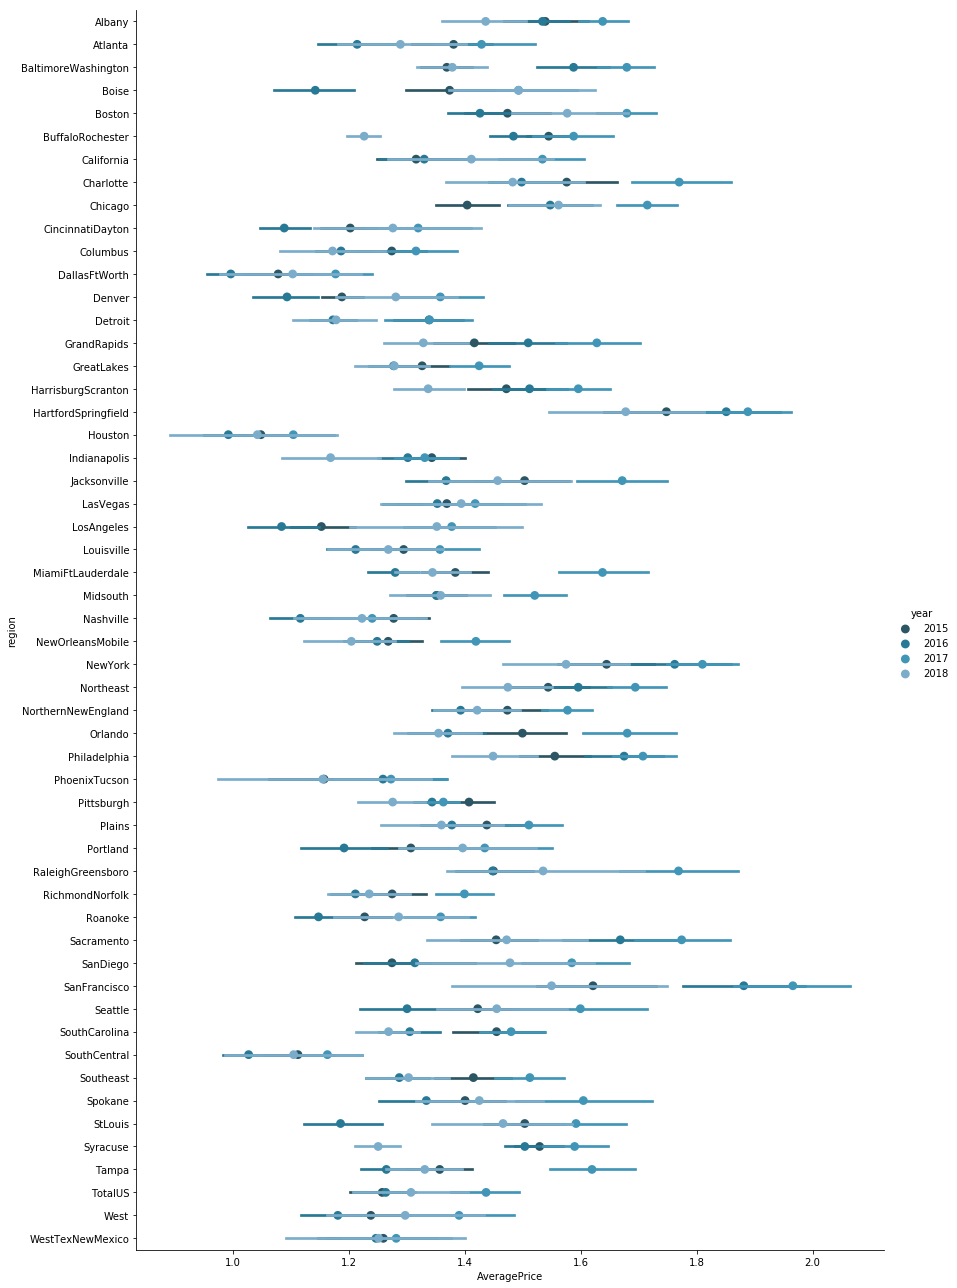

In [43]:
g = sns.factorplot('AveragePrice','region',data=avocado,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='PuBuGn_d',
                   join=False,
              )

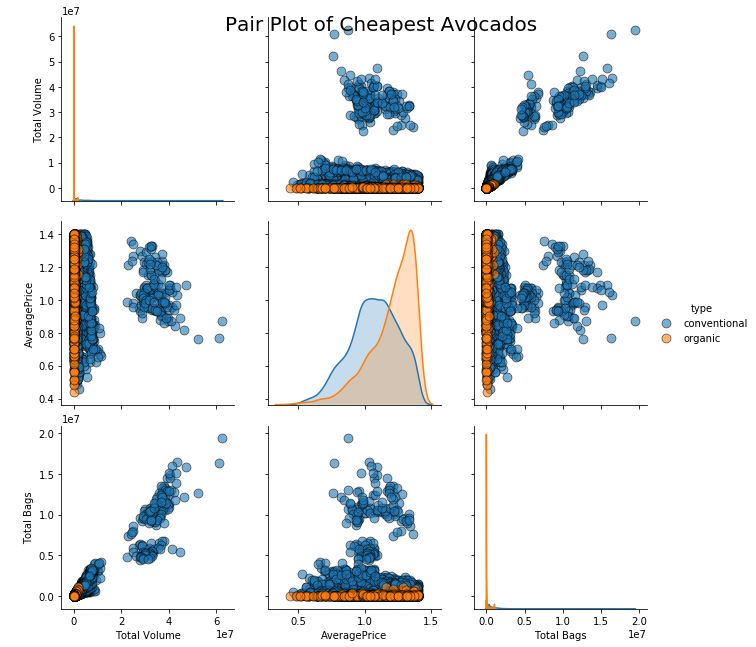

In [44]:
# Plot cheapest avocados
sns.pairplot(avocado[avocado['AveragePrice'] <= 1.406], 
             vars = ['Total Volume', 'AveragePrice', 'Total Bags'], 
             hue = 'type', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
              height= 3);
# Title 
plt.suptitle('Pair Plot of Cheapest Avocados', 
             size = 20);

Here I separated the data where Average Price is lower than the average price, which is considered in the cheapest zone. 
And it seems like Total Bags and Total Volume are correlated.

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



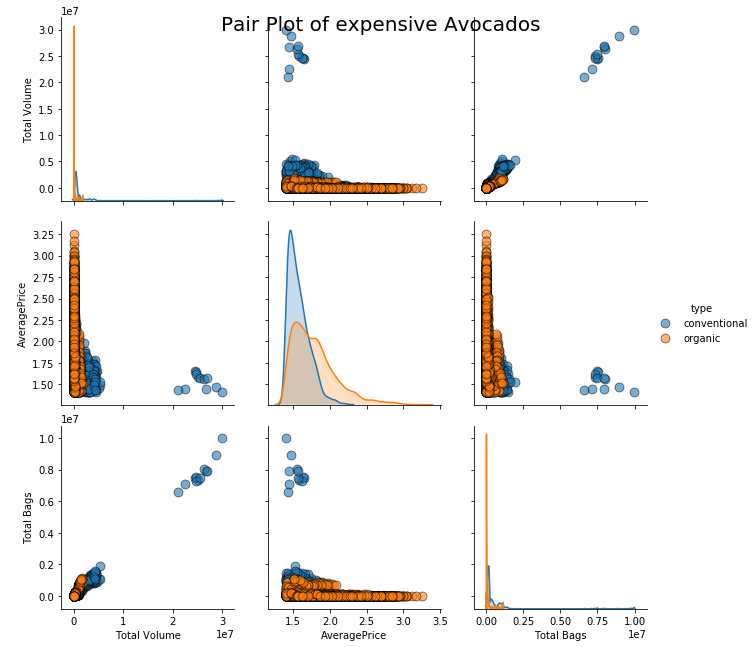

In [45]:
# Plot expensive avocados
sns.pairplot(avocado[avocado['AveragePrice'] > 1.406], 
             vars = ['Total Volume', 'AveragePrice', 'Total Bags'], 
             hue = 'type', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 3);
# Title 
plt.suptitle('Pair Plot of expensive Avocados', 
             size = 20);

In [38]:
cheapest_prices=avocado[avocado.AveragePrice<=1.406]
cheapest_regions=list(set(cheapest_prices['region']))
print(cheapest_regions)

print(len(cheapest_regions))

['Syracuse', 'PhoenixTucson', 'Roanoke', 'RaleighGreensboro', 'SanFrancisco', 'Indianapolis', 'Charlotte', 'Atlanta', 'Nashville', 'NewOrleansMobile', 'MiamiFtLauderdale', 'Southeast', 'HartfordSpringfield', 'California', 'Boise', 'Boston', 'Chicago', 'HarrisburgScranton', 'Tampa', 'BuffaloRochester', 'Louisville', 'CincinnatiDayton', 'SanDiego', 'Plains', 'DallasFtWorth', 'Seattle', 'Houston', 'StLouis', 'LasVegas', 'LosAngeles', 'BaltimoreWashington', 'Philadelphia', 'Detroit', 'GreatLakes', 'Sacramento', 'RichmondNorfolk', 'Denver', 'West', 'WestTexNewMexico', 'NewYork', 'Spokane', 'Orlando', 'Midsouth', 'SouthCentral', 'Jacksonville', 'Albany', 'Pittsburgh', 'SouthCarolina', 'Northeast', 'TotalUS', 'GrandRapids', 'NorthernNewEngland', 'Portland', 'Columbus']
54


All the regions at some point have cheap avocado to sell!

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



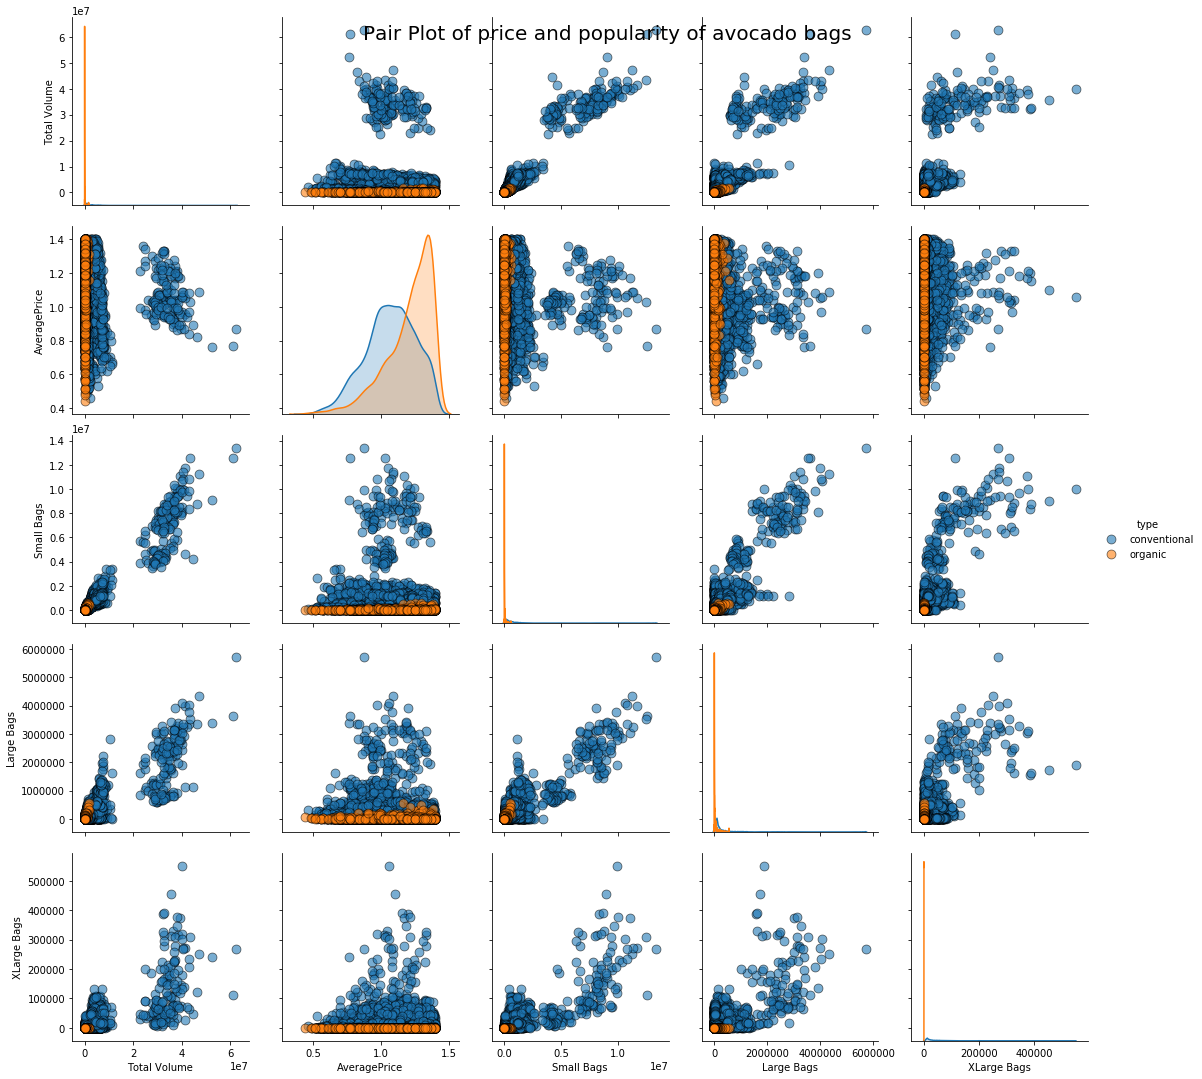

In [39]:
sns.pairplot(avocado[avocado.AveragePrice<=1.406], 
             vars = ['Total Volume', 'AveragePrice','Small Bags', 'Large Bags','XLarge Bags'], 
             hue = 'type', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 3);
# Title 
plt.suptitle('Pair Plot of price and popularity of avocado bags ', 
             size = 20);

****PLUs popularity and price

C:\Users\ellen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



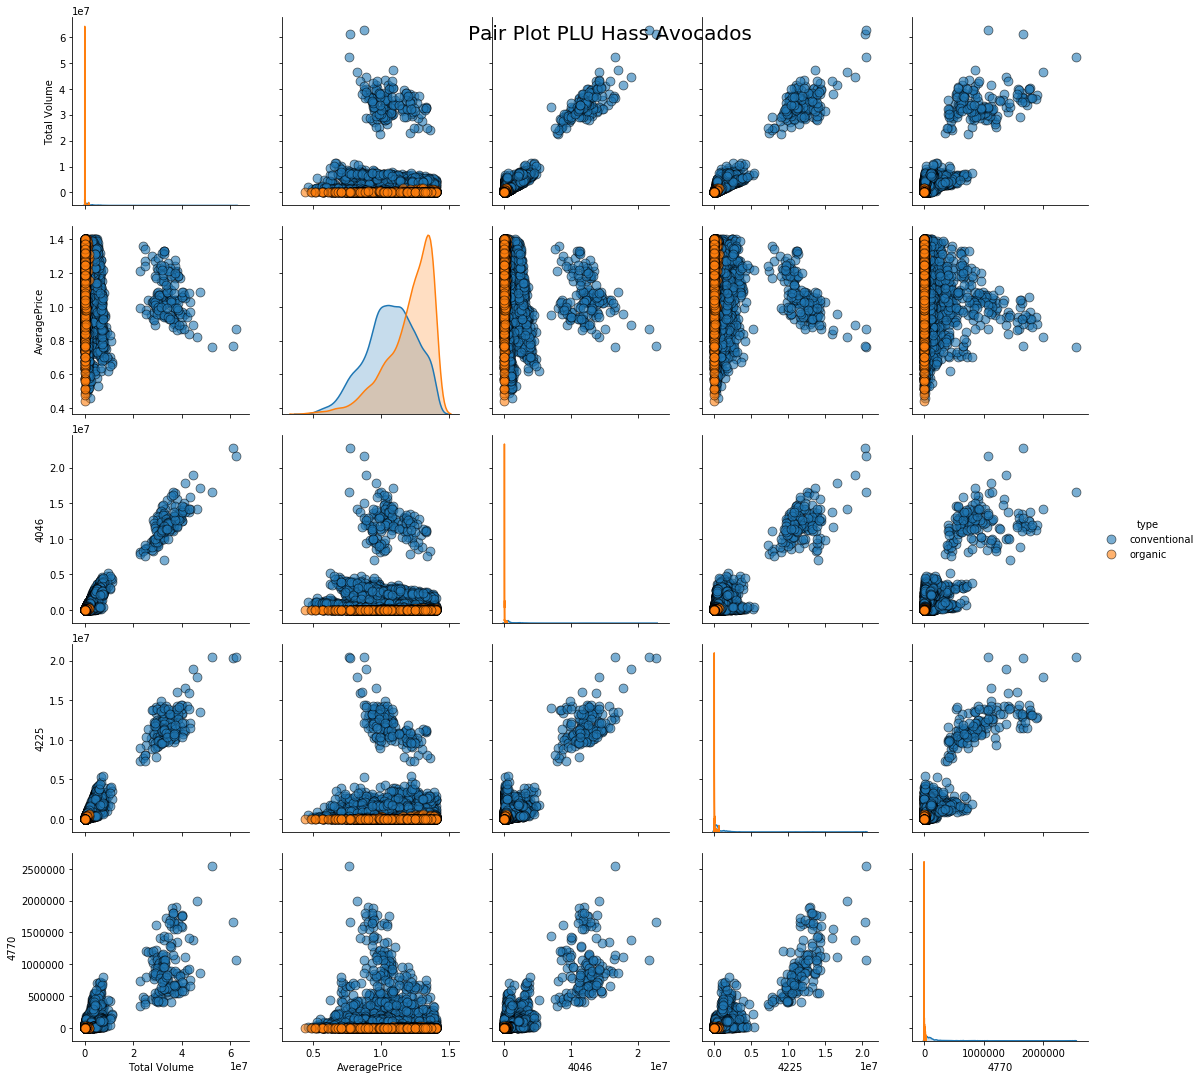

In [40]:
sns.pairplot(avocado[avocado.AveragePrice<=1.406], 
             vars = ['Total Volume', 'AveragePrice','4046', '4225','4770'], 
             hue = 'type', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 3);
# Title 
plt.suptitle('Pair Plot PLU Hass Avocados', 
             size = 20);

Conclusions:
- Avocados are more expensive at the end of the year. And reaches its best price at February, good for storing until Saint Patricks day.
- Houston has the cheapest avocados while HartfordSpringfield has the most expensive. I need now to compare the Customer price index of both cities to find out if the price is related to the local economy.

Fun fact about Hass Avocado:
The Hass avocado was discovered in La Habra Heights, California in the 1920s by Rudolph Hass. Nowadays it is the most widely-consumed type of avocado produced in the U.S. In 1957, Hass avocados only comprised 15% of the total crop yield. By the end of the 2010-2011 crop years, Hass avocados comprised 94.5% of the avocados commercially grown in California. 
